<a href="https://colab.research.google.com/github/VongolaXIman/107-2-Multimedia/blob/master/Keras_Mnist_MLP_h1000_DropOut_h1000_DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
#將「輸入層」與「隱藏層1」加入模型

In [0]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#將「隱藏層2」加入模型

In [0]:
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
#將「輸出層」加入模型

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3636 - acc: 0.8864 - val_loss: 0.1333 - val_acc: 0.9613
Epoch 2/10
 - 1s - loss: 0.1604 - acc: 0.9511 - val_loss: 0.1016 - val_acc: 0.9700
Epoch 3/10
 - 1s - loss: 0.1184 - acc: 0.9626 - val_loss: 0.0862 - val_acc: 0.9727
Epoch 4/10
 - 1s - loss: 0.0979 - acc: 0.9698 - val_loss: 0.0892 - val_acc: 0.9734
Epoch 5/10
 - 1s - loss: 0.0831 - acc: 0.9735 - val_loss: 0.0811 - val_acc: 0.9763
Epoch 6/10
 - 1s - loss: 0.0780 - acc: 0.9752 - val_loss: 0.0769 - val_acc: 0.9757
Epoch 7/10
 - 1s - loss: 0.0615 - acc: 0.9801 - val_loss: 0.0780 - val_acc: 0.9778
Epoch 8/10
 - 1s - loss: 0.0609 - acc: 0.9803 - val_loss: 0.0824 - val_acc: 0.9772
Epoch 9/10
 - 1s - loss: 0.0556 - acc: 0.9825 - val_loss: 0.0690 - val_acc: 0.9800
Epoch 10/10
 - 1s - loss: 0.0523 - acc: 0.9833 - val_loss: 0.0763 - val_acc: 0.9793


# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

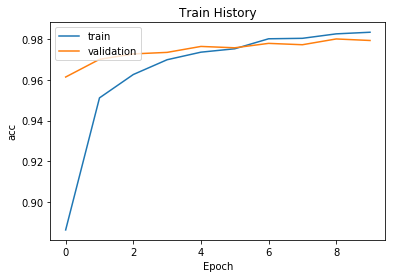

In [0]:
show_train_history(train_history,'acc','val_acc')

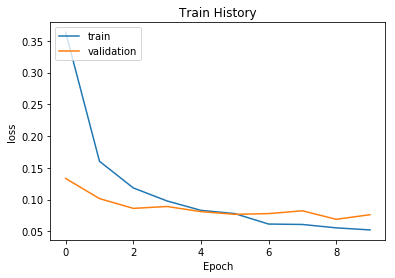

In [0]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [0]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 33us/step

accuracy= 0.98


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [0]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

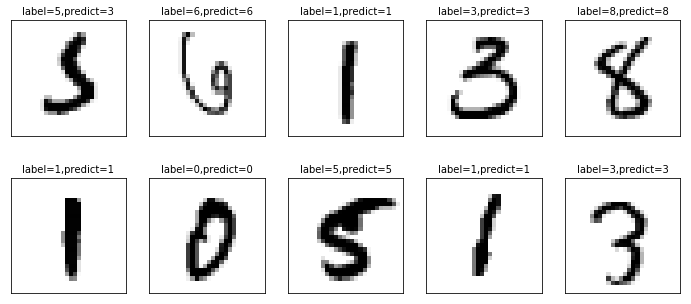

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [0]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,1,0,1,2,1,1,0
1,0,1129,3,1,0,0,2,0,0,0
2,3,0,1020,0,2,0,2,3,2,0
3,0,0,7,991,0,2,0,5,2,3
4,2,2,2,0,967,0,3,0,0,6
5,4,0,0,11,2,861,6,1,3,4
6,6,2,0,1,2,1,946,0,0,0
7,1,7,9,1,0,0,0,1006,1,3
8,3,1,9,7,6,6,6,6,928,2


In [0]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2597,5,3
2810,5,3
4271,5,3
5891,5,3
5913,5,3
5937,5,3
5982,5,3


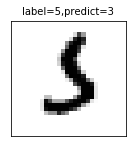

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

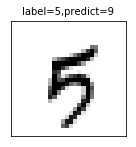

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)